In [55]:
# Importar librerias
import sympy as sp

In [56]:
# definir simbolos
x_s = sp.Symbol("x")
t_s = sp.Symbol("t")
m_s = sp.Symbol("m")
g_s = sp.Symbol("g")
k_s = sp.Symbol("k")
C1_s = sp.Symbol("C1")
v_s = sp.Function("v")(t_s)

In [57]:
# definir ecu dif
eqq = sp.Eq(v_s.diff(t_s) - (m_s * g_s - v_s * k_s) / m_s, 0)
eqq

Eq(Derivative(v(t), t) - (g*m - k*v(t))/m, 0)

In [58]:
# resolver ecu dif
sol = sp.dsolve(eqq)
v_fun = sol.rhs
sol

Eq(v(t), C1*exp(-k*t/m) + g*m/k)

In [59]:
# substituir valores
m = 1
g = 9.81
k = 0.1
c = (-g * m) / k


def_v_fun = v_fun.subs({C1_s: c, k_s: k, g_s: g, m_s: m})
def_v_fun

98.1 - 98.1*exp(-0.1*t)

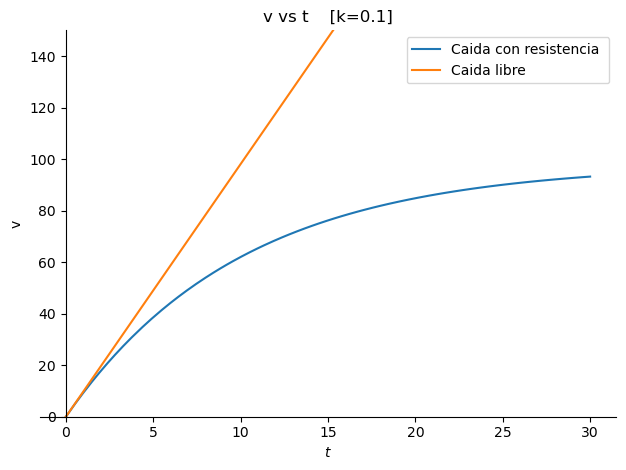

In [115]:
# graficar v vs t
p1 = sp.plot(
    def_v_fun,
    (t_s, 0, 30),
    ylim=[0, 150],
    ylabel="v",
    legend=True,
    title=f"v vs t    [k={k}]",
    show=False,
    label="Caida con resistencia ",
)
p2 = sp.plot(g * t_s, (t_s, 0, 30), label="Caida libre ", show=False)
p1.extend(p2)
p1.show()

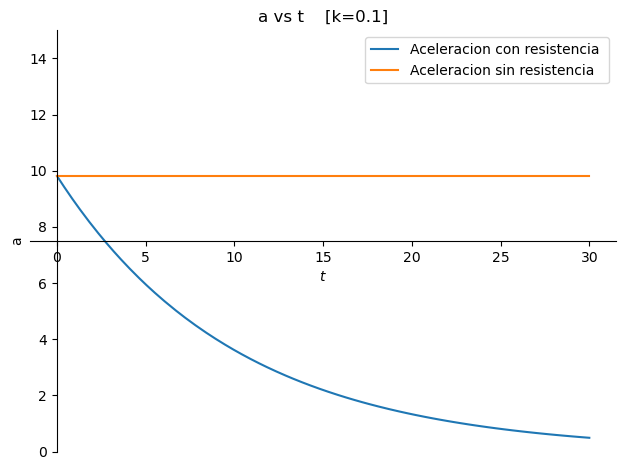

In [149]:
# graficar a vs t
p1 = sp.plot(
    def_v_fun.diff(t_s),
    (t_s, 0, 30),
    ylim=[0, 15],
    ylabel="a",
    legend=True,
    title=f"a vs t    [k={k}]",
    show=False,
    label="Aceleracion con resistencia ",
)
p2 = sp.plot(g, (t_s, 0, 30), label="Aceleracion sin resistencia ", show=False)
p1.extend(p2)
p1.show()

# Parte 2


In [152]:
fpos = sp.integrate(v_fun, t_s)
def_fpos = fpos.subs({C1_s: c, k_s: k, g_s: g, m_s: m})

fpos

g*m*t/k + Piecewise((-C1*m*exp(-k*t/m)/k, Ne(k, 0)), (t*(-g*m/k + (C1*k + g*m)/k), True))

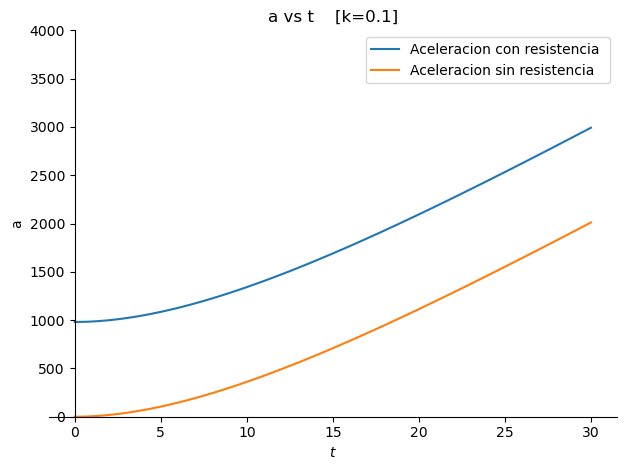

In [153]:
# graficar x vs t
p1 = sp.plot(
    def_fpos,
    (t_s, 0, 30),
    ylim=[0, 4000],
    ylabel="a",
    legend=True,
    title=f"a vs t    [k={k}]",
    show=False,
    label="Aceleracion con resistencia ",
)
ft = (
    (g * m * t_s / k)
    + (g * m**2 * sp.exp(-k * t_s / m)) / (k**2)
    - (g * m**2 / k**2)
)
p2 = sp.plot(ft, (t_s, 0, 30), label="Aceleracion sin resistencia ", show=False)
p1.extend(p2)
p1.show()